In [20]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import numpy as np


df = pd.read_csv("nvda_stock_data_cleaned.csv")
plt.style.use('dark_background')
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.set_index('Date', inplace=True)
# 1. Tính SMA, EMA
# Tính SMA (Simple Moving Average) với khoảng 20 ngày và 50 ngày
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

# Tính EMA (Exponential Moving Average) với khoảng 20 ngày
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

In [21]:
# 2. Tính RSI (Relative Strength Index)
delta = df['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
rsi = 100 - (100 / (1 + rs))
df['RSI'] = rsi

In [22]:
# 3. Tính lợi suất hàng ngày
df['Return'] = df['Close'].pct_change()

In [23]:
# 4. Tính độ biến động (Volatility) theo tháng
df['Volatility'] = df['Return'].rolling(window=30).std()  # rolling 30 ngày

In [24]:
# 5. Vẽ biểu đồ giá cổ phiếu với SMA và EMA
fig = go.Figure()

fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='NVDA Close Price', line=dict(color='blue', width=2.75)))

fig.add_trace(go.Scatter(x=df.index, y=df['SMA20'], mode='lines', name='SMA 20', line=dict(color='orange')))

fig.add_trace(go.Scatter(x=df.index, y=df['SMA50'], mode='lines', name='SMA 50', line=dict(color='green')))

fig.add_trace(go.Scatter(x=df.index, y=df['EMA20'], mode='lines', name='EMA 20', line=dict(color='red')))

fig.update_layout(
    title="NVDA Stock Price with SMA and EMA",
    title_font=dict(
        color='white',  
        size=24,
        family="Arial, sans-serif", 
        weight='bold'
    ),
    xaxis_title="Date",
    yaxis_title="Price",
    hovermode="x unified",
    template="plotly_dark",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)') 
)

fig.show()

In [25]:
# 6. Vẽ biểu đồ phân phối lợi suất
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df['Return'].dropna(),
    nbinsx=50,
    name="Daily Returns",
    marker_color='blue',
    opacity=0.75
))
fig.add_annotation(
    x=df['Return'].mean(),  
    y=10,  
    text="Mean Return",  
    showarrow=True, 
    arrowhead=2,
    ax=0,
    ay=-50,
    font=dict(size=12, color="white"),
    bgcolor="black", 
)

fig.update_layout(
    title="Distribution of NVDA Daily Returns",
    title_font=dict(
        color='white', 
        size=24,
        family="Arial, sans-serif", 
        weight='bold'
    ),
    xaxis_title="Daily Return",
    yaxis_title="Frequency",
    template="plotly_dark", 
    hovermode="closest",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)')
)

fig.show()

In [26]:
# volatility
# Tạo figure mới
fig = go.Figure()

# Vẽ biểu đồ độ biến động (Volatility)
fig.add_trace(go.Scatter(x=df.index, y=df['Volatility'], mode='lines', name='30-day Volatility', line=dict(color='red')))

fig.update_layout(
    title="Volatility of NVDA Stock Price",
    title_font=dict(
        color='white',
        size=24,
        family="Arial, sans-serif", 
        weight='bold'
    ),
    xaxis_title="Date",
    yaxis_title="Volatility",
    template="plotly_dark",
    hovermode="x unified",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)') 
)

fig.show()

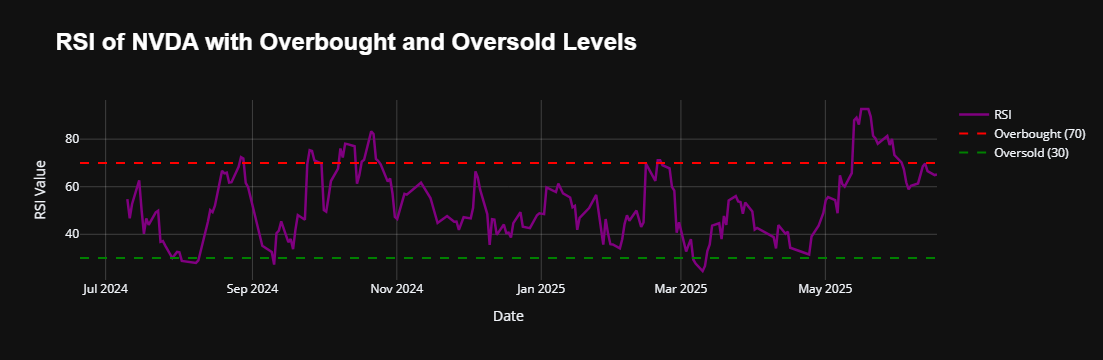

In [27]:
#7 RSI
fig = go.Figure()

# Vẽ RSI
fig.add_trace(go.Scatter(x=df.index, y=df['RSI'], mode='lines', name='RSI', line=dict(color='purple', width=2.5)))

# Vẽ đường Overbought (70) và Oversold (30)
fig.add_trace(go.Scatter(x=df.index, y=[70]*len(df), mode='lines', name='Overbought (70)', line=dict(color='red', dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=[30]*len(df), mode='lines', name='Oversold (30)', line=dict(color='green', dash='dash')))

fig.update_layout(
    title="RSI of NVDA with Overbought and Oversold Levels",
    title_font=dict(
        color='white',
        size=24,
        family="Arial, sans-serif",
        weight='bold'
    ),
    xaxis_title="Date",
    yaxis_title="RSI Value",
    template="plotly_dark",
    hovermode="x unified",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)') 
)

fig.show()

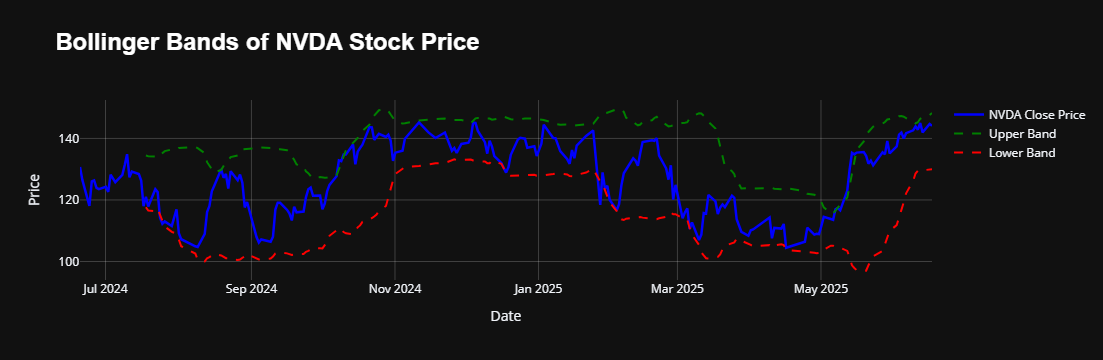

In [28]:
# 9. Vẽ biểu đồ Bollinger Bands
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['Upper Band'] = df['SMA20'] + (df['Close'].rolling(window=20).std() * 2)
df['Lower Band'] = df['SMA20'] - (df['Close'].rolling(window=20).std() * 2)

# Tạo figure mới
fig = go.Figure()

# Vẽ giá cổ phiếu NVDA
fig.add_trace(go.Scatter(x=df.index, y=df['Close'], mode='lines', name='NVDA Close Price', line=dict(color='blue', width=2.5)))

# Vẽ Upper Band và Lower Band
fig.add_trace(go.Scatter(x=df.index, y=df['Upper Band'], mode='lines', name='Upper Band', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=df.index, y=df['Lower Band'], mode='lines', name='Lower Band', line=dict(color='red', dash='dash')))

fig.update_layout(
    title="Bollinger Bands of NVDA Stock Price",
    title_font=dict(
        color='white',
        size=24,
        family="Arial, sans-serif",
        weight='bold' 
    ),
    xaxis_title="Date",
    yaxis_title="Price",
    template="plotly_dark",
    hovermode="x unified",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'),
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)') 
)

fig.show()

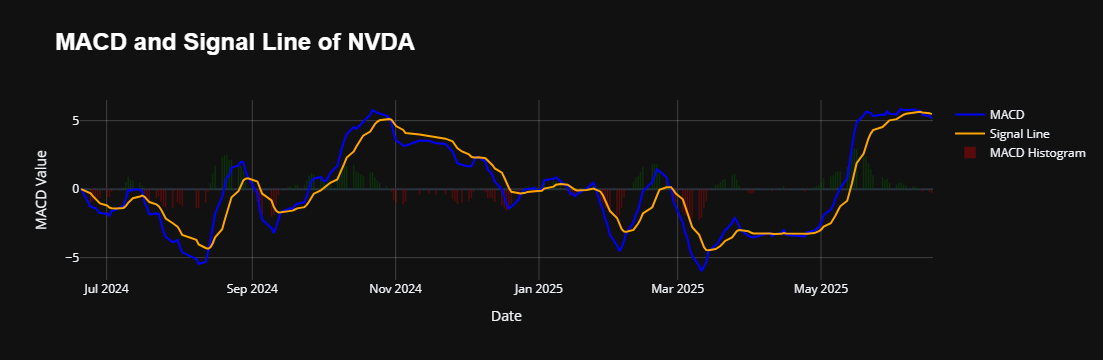

In [29]:
# 10. Vẽ biểu đồ MACD và Signal Line
# Tính MACD và Signal Line
df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = df['EMA12'] - df['EMA26']
df['Signal Line'] = df['MACD'].ewm(span=9, adjust=False).mean()

histogram = df['MACD'] - df['Signal Line']

# Tạo figure mới
fig = go.Figure()

# Vẽ MACD và Signal Line
fig.add_trace(go.Scatter(x=df.index, y=df['MACD'], mode='lines', name='MACD', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df.index, y=df['Signal Line'], mode='lines', name='Signal Line', line=dict(color='orange')))

fig.add_trace(go.Bar(
    x=df.index,
    y=histogram,
    name='MACD Histogram',
    marker_color=np.where(histogram > 0, 'green', 'red'),  # Màu xanh nếu MACD > Signal, ngược lại là đỏ
    opacity=0.3
))

fig.update_layout(
    title="MACD and Signal Line of NVDA",
    title_font=dict(
        color='white',
        size=24,
        family="Arial, sans-serif",
        weight='bold' 
    ),
    xaxis_title="Date",
    yaxis_title="MACD Value",
    template="plotly_dark", 
    hovermode="x unified",
    xaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)'), 
    yaxis=dict(showgrid=True, gridcolor='rgba(255,255,255,0.2)')
)

fig.show()